### Load Data

In [2]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_train = pd.read_parquet('../../data/model_data/training_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_train

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days
0,2015-12-24 00:00:00+00:00,AAPL,24.194263,24.494490,54281600.0,0.970395,25.979742,24.720767,27.224792,24.798318,26.579572,26.436727,27.177436,25.869796,-1.781253,0.142845,-0.740709,1.307640,195440160.0,144712000.0,145997280.0,173605320.0,208087560.0,0,1
1,2015-12-24 00:00:00+00:00,CAT,59.485294,55.321060,2322100.0,2.065715,55.659195,52.515944,57.955542,53.339613,55.278802,56.091318,58.437958,56.003994,-1.939189,-0.812516,-2.346640,2.433964,7296050.0,6032330.0,5290740.0,5432720.0,7550870.0,0,1
2,2015-12-24 00:00:00+00:00,CVX,65.311241,63.431988,4998700.0,2.167446,61.728233,59.691293,64.050002,62.549253,61.578304,62.236110,63.787218,61.303701,0.970949,-0.657806,-1.551108,2.483516,13462920.0,11568740.0,7670770.0,10350960.0,8460490.0,0,1
3,2015-12-24 00:00:00+00:00,GS,129.326538,152.492950,1107600.0,4.884594,155.194709,149.171555,160.820096,150.637677,156.244505,159.165193,160.955830,154.478665,-5.606828,-2.920688,-1.790637,6.477165,3325280.0,2986550.0,2618510.0,2585760.0,3099650.0,1,1
4,2015-12-24 00:00:00+00:00,HD,106.316124,107.910774,1517100.0,4.386560,102.682560,97.203424,108.652122,106.975397,108.263686,103.085273,100.959200,99.922850,-1.288289,5.178413,2.126073,1.036349,4665940.0,5317790.0,6897670.0,4067060.0,4360900.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29140,2024-07-03 00:00:00+00:00,MRK,113.690002,125.013603,4002100.0,2.291954,127.255922,124.141795,129.840558,128.426771,128.371864,126.554128,128.660353,127.112034,0.054907,1.817735,-2.106225,1.548319,14149900.0,6875150.0,8756370.0,6744190.0,7520570.0,0,1
29141,2024-07-03 00:00:00+00:00,MSFT,428.019989,459.940979,9932800.0,18.010069,423.058963,400.674808,449.087555,451.470270,434.501843,422.797949,415.489096,401.206888,16.968427,11.703894,7.308853,14.282208,18827580.0,16383640.0,20807330.0,16184590.0,22515970.0,3,7
29142,2024-07-03 00:00:00+00:00,UNH,581.849976,488.159027,2239200.0,18.427638,489.701731,474.279044,512.867938,488.678171,491.051801,499.923950,509.058670,486.139514,-2.373630,-8.872150,-9.134720,22.919156,5933730.0,3452100.0,3867740.0,2913310.0,3079510.0,0,1
29143,2024-07-03 00:00:00+00:00,WBA,9.060000,10.841380,26845500.0,1.659137,15.978217,14.771623,17.460229,13.444287,15.364481,15.533450,17.143166,17.035427,-1.920194,-0.168969,-1.609716,0.107739,34387240.0,9924720.0,16974690.0,8874300.0,8472370.0,0,1


In [3]:
df_val = pd.read_parquet('../../data/model_data/validation_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_val

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days
0,2015-12-24 00:00:00+00:00,AXP,53.312790,61.423836,1956400.0,2.345914,63.849332,61.135779,67.412856,60.703300,62.062912,62.931396,64.562424,66.024479,-1.359612,-0.868484,-1.631028,-1.462054,6577980.0,5235460.0,4932520.0,6215000.0,7275040.0,0,1
1,2015-12-24 00:00:00+00:00,CSCO,21.135672,20.633146,8166300.0,0.663431,20.801952,20.064189,21.748457,20.199084,20.508805,20.470374,21.454555,21.639188,-0.309721,0.038431,-0.984182,-0.184632,24778710.0,23627670.0,36908410.0,26037480.0,22088420.0,0,0
2,2015-12-24 00:00:00+00:00,DIS,90.638680,99.091301,4356100.0,4.315714,104.091629,98.092763,109.261369,101.826469,105.414491,109.385078,107.113773,103.566383,-3.588022,-3.970586,2.271304,3.547391,13367630.0,9767410.0,7206910.0,10503590.0,7509160.0,0,0
3,2015-12-24 00:00:00+00:00,HON,89.748055,83.227882,832731.0,2.097698,80.788164,77.708540,82.883507,81.141813,82.130360,82.126520,81.710297,79.408560,-0.988548,0.003841,0.416223,2.301736,4516328.5,2761647.1,3331478.4,2719260.4,5065076.9,0,0
4,2015-12-24 00:00:00+00:00,IBM,94.954712,89.372406,1563979.0,3.139906,90.550352,87.276630,96.078659,88.528802,89.805550,87.817047,89.249786,92.376886,-1.276748,1.988503,-1.432738,-3.127100,5200565.6,4224271.1,4412456.8,4705525.0,7938480.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,2024-07-03 00:00:00+00:00,HON,207.630005,211.303818,1086700.0,7.978585,201.162974,191.553133,212.279465,212.592758,208.578725,200.346765,200.930688,192.291165,4.014034,8.231960,-0.583923,8.639523,3191020.0,2572380.0,2527860.0,2425270.0,3180500.0,1,0
17148,2024-07-03 00:00:00+00:00,IBM,220.839996,174.206345,1649000.0,5.953506,170.180709,164.179771,178.995076,172.272269,167.799390,167.435568,166.491324,166.810649,4.472879,0.363821,0.944244,-0.319325,4160870.0,3158030.0,3664780.0,3185900.0,6598910.0,0,1
17149,2024-07-03 00:00:00+00:00,KO,71.790001,62.898792,9154200.0,1.688137,61.385548,58.183553,63.035769,62.981226,62.507845,61.625074,62.122773,60.898728,0.473381,0.882772,-0.497699,1.224045,12866900.0,10049930.0,10997740.0,10137340.0,14469920.0,0,0
17150,2024-07-03 00:00:00+00:00,MCD,303.690002,248.553665,2026100.0,7.925374,261.112749,250.336351,270.584464,253.481990,253.631113,255.584926,267.550943,270.286166,-0.149123,-1.953813,-11.966017,-2.735223,4482100.0,2999610.0,4030070.0,3195520.0,3825750.0,0,0


In [4]:
df_test = pd.read_parquet('../../data/model_data/testing_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_test

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days
0,2015-12-24 00:00:00+00:00,AMGN,115.816658,126.452103,943000.0,4.877767,120.935859,113.872980,125.740771,124.367628,123.584390,122.481847,123.234310,119.349458,0.783237,1.102544,-0.752464,3.884852,3509140.0,2935060.0,3244410.0,3121370.0,3939210.0,0,1
1,2015-12-24 00:00:00+00:00,BA,120.255928,128.722504,1185000.0,4.418714,128.754730,122.425815,132.987834,128.988866,131.408534,131.562788,131.684204,127.417228,-2.419669,-0.154253,-0.121416,4.266976,4102880.0,3429540.0,2874360.0,2669230.0,4932430.0,0,0
2,2015-12-24 00:00:00+00:00,CRM,71.462753,77.486023,1084700.0,1.959126,77.697573,74.935341,80.333372,77.316764,80.091447,78.447742,78.189886,77.475058,-2.774683,1.643704,0.257856,0.714828,3380550.0,3321140.0,4858610.0,2680950.0,3133940.0,0,0
3,2015-12-24 00:00:00+00:00,MMM,101.896019,93.109833,1014686.0,3.042756,94.410902,90.543301,97.323853,92.691669,96.557341,96.801584,96.959827,93.484661,-3.865672,-0.244243,-0.158244,3.475166,4314270.8,2702302.2,2377576.3,2735491.2,3282111.0,0,4
4,2015-12-24 00:00:00+00:00,PG,65.515038,62.572762,2498000.0,1.708618,59.624889,57.670639,61.964988,62.221431,60.184812,59.228064,59.851521,59.040537,2.036619,0.956747,-0.623456,0.810983,11361240.0,8779930.0,7697420.0,7611840.0,10391110.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,2024-07-03 00:00:00+00:00,MMM,137.300003,101.075127,1230800.0,4.311441,97.311003,90.673070,101.844837,101.428220,99.968090,99.001164,99.215373,93.435883,1.460130,0.966926,-0.214209,5.779490,3857360.0,3596170.0,5981670.0,4513980.0,6318350.0,0,1
17148,2024-07-03 00:00:00+00:00,PG,173.550003,162.850555,2980500.0,4.032108,162.986984,155.269542,166.811732,165.074182,166.086095,164.065250,165.471790,161.920151,-1.011913,2.020845,-1.406540,3.551639,7454720.0,5010550.0,5626180.0,5269990.0,6465080.0,1,2
17149,2024-07-03 00:00:00+00:00,TRV,236.110001,202.802933,523100.0,4.858594,211.269899,204.942570,217.742920,205.892415,207.809865,210.726520,215.512764,211.772733,-1.917450,-2.916655,-4.786244,3.740031,1482260.0,1208760.0,1186330.0,952710.0,1215390.0,0,0
17150,2024-07-03 00:00:00+00:00,V,275.170013,268.451660,5017800.0,4.046228,272.651303,267.565256,277.995547,269.957657,273.140280,272.119324,278.085852,270.490982,-3.182623,1.020956,-5.966528,7.594870,12733170.0,6560590.0,5575850.0,10566510.0,5965770.0,1,2


### Feature Setup

In [5]:
X_train = df_train.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_train = df_train['Adj Close in 60 Days'] - df_train['Adj Close']

X_val = df_val.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_val = df_val['Adj Close in 60 Days'] - df_val['Adj Close']

X_test = df_test.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_test = df_test['Adj Close in 60 Days'] - df_test['Adj Close']

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((29145, 22), (17152, 22), (17152, 22), (29145,), (17152,), (17152,))

### Hyperparameter Tuning

In [6]:
try:
    import optuna
except ModuleNotFoundError:
    !pip install optuna
    import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00


In [7]:
from sklearn.metrics import mean_pinball_loss
from lightgbm import LGBMRegressor
import numpy as np

def objective(trial):
    # model tuning
    params = {
        'random_state': 22,
        'objective': 'quantile',
        'metric': 'quantile',
        'alpha': 0.1,
        'verbosity': -1,
        'n_estimators': 500,
        'early_stopping_round': 25,
        # 'monotone_constraints': monotone_contraints,
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'num_leaves': trial.suggest_int('num_leaves', 2, 2**8),
        'feature_fraction': trial.suggest_float('feature_fraction', 1e-8, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
    }
    mod = LGBMRegressor(**params)

    # cross validation
    mod.fit(
        X_train,
        y_train,
        eval_set=(X_val, y_val),
    )

    return mean_pinball_loss(y_test, mod.predict(X_test), alpha=0.1)

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22, n_startup_trials=25, multivariate=True))
study.optimize(objective, n_trials=50, show_progress_bar=True)

study.best_params

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-11-03 07:05:52,622] A new study created in memory with name: no-name-b69968ba-7b69-42bf-8f2b-e513b6f9030e


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-11-03 07:05:54,071] Trial 0 finished with value: 3.8762282297238757 and parameters: {'lambda_l1': 2.084605381503821, 'lambda_l2': 4.816810622816848, 'max_depth': 14, 'num_leaves': 221, 'feature_fraction': 0.17116156190005774, 'min_child_samples': 34}. Best is trial 0 with value: 3.8762282297238757.
[I 2024-11-03 07:05:55,251] Trial 1 finished with value: 3.484553311575602 and parameters: {'lambda_l1': 2.7053283402729833, 'lambda_l2': 6.910413507585547, 'max_depth': 8, 'num_leaves': 209, 'feature_fraction': 0.010526884210839693, 'min_child_samples': 57}. Best is trial 1 with value: 3.484553311575602.
[I 2024-11-03 07:05:57,270] Trial 2 finished with value: 3.3303065593701886 and parameters: {'lambda_l1': 8.137261876014703, 'lambda_l2': 7.451002963137353, 'max_depth': 7, 'num_leaves': 3, 'feature_fraction': 0.7720438737240976, 'min_child_samples': 96}. Best is trial 2 with value: 3.3303065593701886.
[I 2024-11-03 07:05:59,011] Trial 3 finished with value: 3.8922752338019144 and p

{'lambda_l1': 8.038535684069508,
 'lambda_l2': 8.07672059410554,
 'max_depth': 2,
 'num_leaves': 203,
 'feature_fraction': 0.450041684177444,
 'min_child_samples': 86}

### Evaluation

In [8]:
best_params = {
    'random_state': 22,
    'objective': 'quantile',
    'metric': 'quantile',
    'alpha': 0.1,
    'verbosity': -1,
    'n_estimators': 500,
    'early_stopping_round': 25,
}

best_params.update(**study.best_params)

mod = LGBMRegressor(**best_params)

mod.fit(
    X_train,
    y_train,
    eval_set=(X_val, y_val),
)

df_test['Prediction'] = mod.predict(X_test) + df_test['Adj Close']

mean_pinball_loss(df_test['Adj Close in 60 Days'], df_test['Prediction'], alpha=0.1)

3.3289710096601755

In [9]:
# directional accuracy
((df_test['Adj Close in 60 Days'] >= df_test['Adj Close']) == (df_test['Prediction'] >= df_test['Adj Close'])).mean()

0.3807136194029851

In [10]:
(df_test['Adj Close in 60 Days'] - df_test['Prediction']).describe()

,0
count,17152.000000
mean,17.158865
std,22.950760
min,-205.370187
25%,4.780840
50%,13.596006
75%,26.396587
max,145.092119


In [11]:
(df_test['Adj Close in 60 Days'] - df_test['Prediction']).abs().describe()

,0
count,17152.000000
mean,20.385034
std,20.139696
min,0.001673
25%,6.460857
50%,14.570082
75%,27.441653
max,205.370187


What is the distribution of predictions from the model?

In [25]:
(df_test['Prediction'] - df_test['Adj Close']).describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,0
count,17152.000000
mean,-13.895897
std,8.670919
min,-39.938548
5%,-28.361887
10%,-26.997362
25%,-17.630954
50%,-12.226054
75%,-7.050880
90%,-3.957482


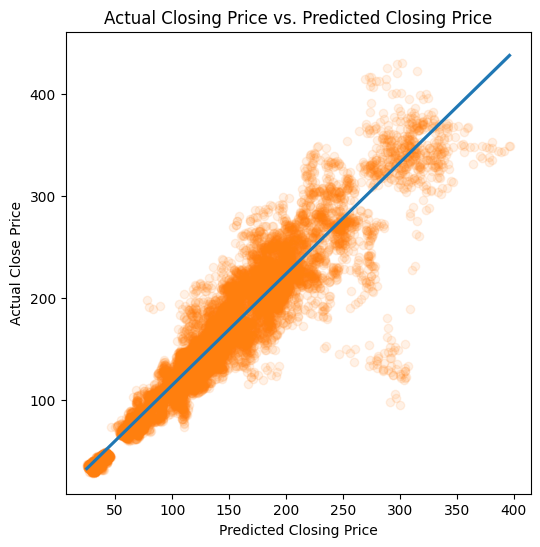

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test,
    x='Prediction',
    y='Adj Close in 60 Days',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[1]},
    line_kws={'color': sns.color_palette()[0]},
)

plt.title('Actual Closing Price vs. Predicted Closing Price')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Actual Close Price')

plt.show()

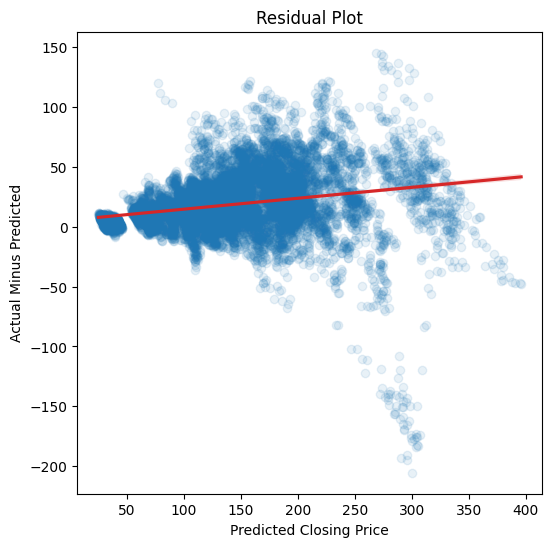

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test.assign(f=(df_test['Adj Close in 60 Days'] - df_test['Prediction'])),
    x='Prediction',
    y='f',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[0]},
    line_kws={'color': sns.color_palette()[3]},
)

plt.title('Residual Plot')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Actual Minus Predicted')

plt.show()

In [14]:
(df_test['Prediction'] > df_test['Adj Close']).mean()

0.0

In [15]:
(df_test['Adj Close in 60 Days'] > df_test['Adj Close']).mean()

0.6192280783582089

In [16]:
df_test.loc[df_test['Prediction'] > df_test['Adj Close'], ['Adj Close', 'Adj Close in 60 Days']].diff(axis=1)['Adj Close in 60 Days'].sum()

0.0

In [17]:
df_test.loc[df_test['Prediction'] < df_test['Adj Close'], ['Adj Close', 'Adj Close in 60 Days']].diff(axis=1)['Adj Close in 60 Days'].sum()

55966.433000564575

In [18]:
(df_test['Adj Close in 60 Days'] - df_test['Adj Close']).describe()

,0
count,17152.000000
mean,3.262968
std,22.064209
min,-240.543556
25%,-4.017086
50%,3.005753
75%,11.673393
max,110.637756


In [19]:
(df_test['Prediction'] - df_test['Adj Close']).describe()

,0
count,17152.000000
mean,-13.895897
std,8.670919
min,-39.938548
25%,-17.630954
50%,-12.226054
75%,-7.050880
max,-0.545121


In [20]:
(df_test['Prediction'] - df_test['Adj Close in 60 Days']).describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90])

,0
count,17152.000000
mean,-17.158865
std,22.950760
min,-145.092119
10%,-44.537365
25%,-26.396587
50%,-13.596006
75%,-4.780840
90%,0.924162
max,205.370187


In [21]:
(df_test['Prediction'] >= df_test['Adj Close in 60 Days']).mean()

0.11642957089552239

In [22]:
try:
    import shap
except ModuleNotFoundError:
    !pip install shap
    import shap

In [23]:
explainer = shap.Explainer(mod, feature_names=X_train.columns, seed=22)

shap_values = explainer(X_test)

shap_values.shape

(17152, 22)

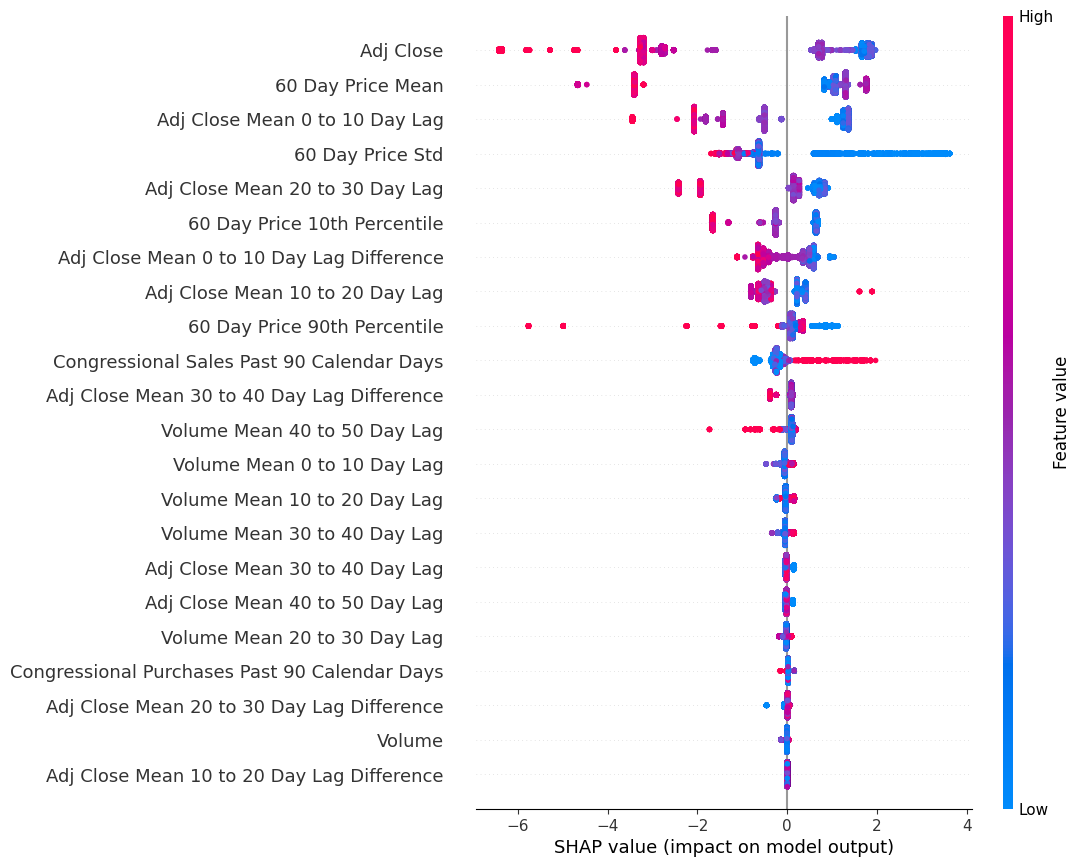

In [24]:
shap.plots.beeswarm(shap_values, max_display=None)